In [2]:
from result_storing_utils import get_data, retrieve_ess_data, get_cyc_model, get_normal_model
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
step_size = 2.0
num_cycles = 1000
init_bal = 1.0
base_dir = "figs/ising_sample"

base_model_dula = get_normal_model('dula', .2)
base_model_dmala = get_normal_model('dmala', .4)

# Baseline

DMALA stepsize = .2, DULA stepsize = .2
Because I was able to get similar results to in the paper for DMALA, I will just use the best DULA results from there as a benchmark

In [4]:
base_dir_ising = 'figs/ising_sample'
base_dir_rbm = 'figs/rbm_sample'
x_values = [(i+1) * 1000 for i in range(50)]
dmala = get_data(base_dir_ising, base_model_dmala, 'log_rmses')
dula = get_data(base_dir_ising, base_model_dula, 'log_rmses')
plt.plot(x_values, dmala, label='dmala stepsize .4')
plt.plot(x_values, dula, label='dula stepsize .2')
plt.grid()
plt.xlabel("Iters")
plt.ylabel("log rmse")
plt.yticks([-5, -4, -3, -2, -1, 0])
plt.legend()

plt.title("Baseline Log RMSE for Ising Sample")

FileNotFoundError: [Errno 2] No such file or directory: 'figs/ising_sample/dmala_stepsize_0.4_log_rmses.npy'

In [5]:
ess = retrieve_ess_data(base_dir_ising, base_model_dmala)
ess

FileNotFoundError: [Errno 2] No such file or directory: 'figs/ising_sample/dmala_stepsize_0.4_ess_res.pickle'

In [6]:
base_dir_ising = 'figs/ising_sample'
base_dir_rbm = 'figs/rbm_sample'
base_dir_ising_learn = 'figs/ising_learn'

Text(0.5, 1.0, 'Baseline Log MMDS for RBM Sample')

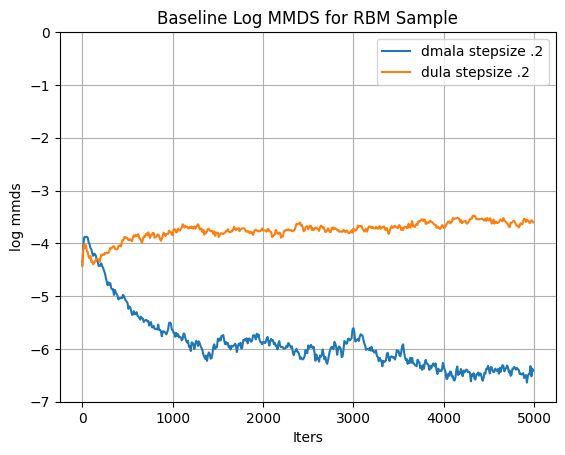

In [7]:
base_model_dula = get_normal_model('dula', .2)
base_model_dmala = get_normal_model('dmala', .2)
dmala = get_data(base_dir_rbm, base_model_dmala, 'log_mmds')
dula = get_data(base_dir_rbm, base_model_dula, 'log_mmds')
x_values = [i * 10 for i in range(500)]
plt.plot(x_values, dmala, label='dmala stepsize .2')
plt.plot(x_values, dula, label='dula stepsize .2')
plt.grid()
plt.xlabel("Iters")
plt.ylabel("log mmds")
plt.yticks([-7, -6, -5, -4, -3, -2, -1, 0])
plt.legend()
plt.title("Baseline Log MMDS for RBM Sample")

In [8]:
dmala[-100:].mean()

-6.445344114303589

In [9]:
base_model_dula = get_normal_model('dula', .1)
base_model_dmala = get_normal_model('dmala', .2)
dmala = get_data(base_dir_ising_learn, base_model_dmala, 'rmse')
dula = get_data(base_dir_ising_learn, base_model_dula, 'rmse')
plt.plot(np.log(dmala), label='dmala stepsize .2')
plt.plot(np.log(dula), label='dula stepsize .2')
plt.grid()
plt.xlabel("Iters")
plt.ylabel("log rmse")
# plt.yticks([-7, -6, -5, -4, -3, -2, -1, 0])
plt.legend()
plt.title("Baseline Log MMDS for Ising Learn")

FileNotFoundError: [Errno 2] No such file or directory: 'figs/ising_learn/dmala_stepsize_0.2_rmse.npy'

# Cyclical Results: Ising Sample

Pretty much the same performance, but cyclical dula is more efficient

In [10]:
ising_sample_base = get_data(base_dir_ising, 
                            get_normal_model('dmala', .4),
                            'log_rmses')
cyc_dula_ising_sample = get_data(base_dir_ising, 
                                get_cyc_model('cyc_dula', 1000, 2.0, True, 1.0, True, False), 'log_rmses')
cyc_dmala_ising_sample = get_data(base_dir_ising, 
                                get_cyc_model('cyc_dmala', 5000, 2.0, True, 1.0, True, False), 'log_rmses')

ising_sample_base_times = get_data(base_dir_ising, 
                            get_normal_model('dmala', .4),
                            'times')
cyc_dula_ising_sample_times = get_data(base_dir_ising, 
                                get_cyc_model('cyc_dula', 1000, 2.0, True, 1.0, True, False), 'times')
cyc_dmala_ising_sample_times = get_data(base_dir_ising, 
                                get_cyc_model('cyc_dmala', 5000, 2.0, True, 1.0, True, False), 'times')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

x = [i * 1000 for i in range(50)]
ax[0].plot(x, ising_sample_base, label='baseline dmala')
ax[0].plot(x, cyc_dula_ising_sample, label='best cyc-DULA')
ax[0].plot(x, cyc_dmala_ising_sample, label='best cyc-DMALA')
ax[0].grid()
ax[0].legend()
plt.grid()
ax[0].set_ylabel('log rmse')
ax[0].set_xlabel('Iterations')

ax[1].plot(ising_sample_base_times, ising_sample_base, label="baseline dmala")
ax[1].plot(cyc_dula_ising_sample_times, cyc_dula_ising_sample, label="best cyc-DULA")
ax[1].plot(cyc_dmala_ising_sample_times, cyc_dmala_ising_sample, label="best cyc-DMALA")
ax[1].set_xlabel('Runtime (s)')

FileNotFoundError: [Errno 2] No such file or directory: 'figs/ising_sample/dmala_stepsize_0.4_log_rmses.npy'

In [11]:
len(cyc_dmala_ising_sample_times)

NameError: name 'cyc_dmala_ising_sample_times' is not defined

In [12]:
#### ess_orig = retrieve_ess_data(base_dir_ising, get_normal_model('dmala', .4))
print(f"Orig ESS: {ess_orig['ess_std']/ising_sample_base_times[-1]}")

ess_cyc = retrieve_ess_data(base_dir_ising, get_cyc_model('cyc_dula', 1000, 2.0, True, 1.0, True))
print(f"Cyc ESS: {ess_cyc['ess_std']/cyc_dula_ising_sample_times[-1]}")

ess_cyc_dmala = retrieve_ess_data(base_dir_ising, get_cyc_model('cyc_dmala', 5000, 2.0, True, 1.0, True))
print(f"Cyc ESS: {ess_cyc_dmala['ess_std']/cyc_dmala_ising_sample_times[-1]}")


NameError: name 'ess_orig' is not defined

In [13]:
ess_cyc_dmala

NameError: name 'ess_cyc_dmala' is not defined

# RBM Sample Results

Original Beats Cyclical, but cyclical is more efficient

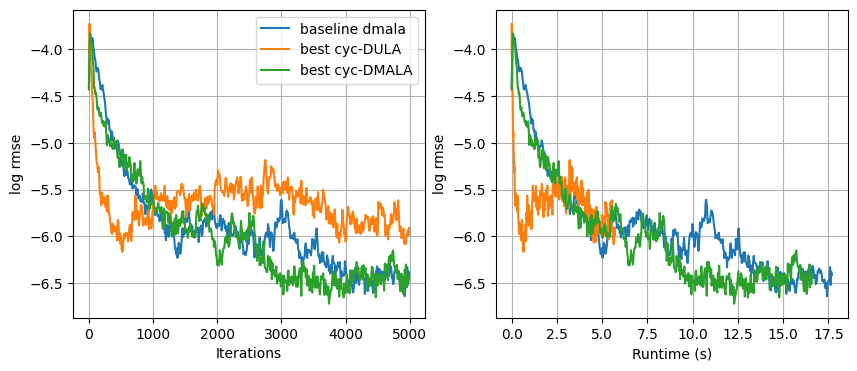

In [14]:
ising_sample_base = get_data(base_dir_rbm, 
                            get_normal_model('dmala', .2),
                            'log_mmds')

cyc_dula_ising_sample = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dula', 500, 2.0, True, 1.0, True, False), 'log_mmds')

cyc_dmala_ising_sample = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dmala', 500, 2.0, True, 1.0, True, False), 'log_mmds')

ising_sample_base_times = get_data(base_dir_rbm, 
                            get_normal_model('dmala', .2),
                            'times')

cyc_dula_ising_sample_times = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dula', 500, 2.0, True, 1.0, True, False), 'times')

cyc_dmala_ising_sample_times = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dmala', 500, 2.0, True, 1.0, True, False), 'times')


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

x = [i * 10 for i in range(500)]
ax[0].plot(x, ising_sample_base, label='baseline dmala')
ax[0].plot(x, cyc_dula_ising_sample, label='best cyc-DULA')
ax[0].plot(x, cyc_dmala_ising_sample, label='best cyc-DMALA')
ax[0].grid()
ax[0].set_ylabel('log rmse')
ax[0].set_xlabel('Iterations')

ax[1].plot(ising_sample_base_times, ising_sample_base, label='baseline dmala')
ax[1].plot(cyc_dula_ising_sample_times, cyc_dula_ising_sample, label='best cyc-DULA')
ax[1].plot(cyc_dmala_ising_sample_times, cyc_dmala_ising_sample, label='best cyc-DMALA')
ax[1].grid()
ax[1].set_ylabel('log rmse')
ax[1].set_xlabel('Runtime (s)')
ax[0].legend()

In [15]:
# rbm_sample_base = get_data(base_dir_rbm, 
                            get_normal_model('dmala', .2),
                            'log_mmds')
rbm_sample_base_times = get_data(base_dir_rbm, 
                            get_normal_model('dmala', .2),
                            'times')
cyc_dula_rbm_sample = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dula', 500, 2.0, True, 1.0, True), 'log_mmds')
cyc_dula_rbm_sample_times = get_data(base_dir_rbm, 
                                get_cyc_model('cyc_dula', 500, 2.0, True, 1.0, True), 'times')


plt.plot(rbm_sample_base_times, rbm_sample_base, label='baseline dmala')
plt.plot(cyc_dula_rbm_sample_times, cyc_dula_rbm_sample, label='best cyclical variant')
plt.grid()
plt.ylabel('log mmds')
plt.xlabel('Time')
plt.title("Comparison of Original v Cyclical RBM Sample")
plt.legend()

IndentationError: unexpected indent (678827896.py, line 2)

In [16]:
ess_orig = retrieve_ess_data(base_dir_rbm, get_normal_model('dmala', .2))
print(f"Orig ESS: {ess_orig}")

ess_cyc = retrieve_ess_data(base_dir_rbm, get_cyc_model('cyc_dula', 500, 2.0, True, 1.0, True))
print(f"Cyc ESS: {ess_cyc}")

Orig ESS: {'ess_mean': 611.5721, 'ess_std': 1254.5378}


TypeError: get_cyc_model() missing 1 required positional argument: 'half_mh'

# Ising Learn Results



In [17]:
ising_learn_base = get_data(base_dir_ising_learn, 
                            get_normal_model('dmala', .2),
                            'rmse')
cyc_dula_ising_learn = get_data(base_dir_ising_learn, 
                                get_cyc_model('cyc_dula', 2, 2.0, True, 1.0, True), 'rmse')
cyc_dmala_ising_learn = get_data(base_dir_ising_learn, 
                                get_cyc_model('cyc_dmala', 2, 2.0, True, 1.0, True), 'rmse')

ising_learn_base_times = get_data(base_dir_ising_learn, 
                            get_normal_model('dmala', .2),
                            'times')
cyc_dula_ising_learn_times = get_data(base_dir_ising_learn, 
                                get_cyc_model('cyc_dula', 2, 2.0, True, 1.0, True), 'times')
cyc_dmala_ising_learn_times = get_data(base_dir_ising_learn, 
                                get_cyc_model('cyc_dmala', 2, 2.0, True, 1.0, True), 'times')
x = [i * 1000 for i in range(11)]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(x, np.log(ising_learn_base), label='baseline dmala')
ax[0].plot(x, np.log(cyc_dula_ising_learn), label='cyc-DULA')
ax[0].plot(x, np.log(cyc_dmala_ising_learn), label='cyc-DMALA')

ax[0].grid()
ax[0].set_ylabel('log rmse')
ax[0].set_xlabel('Iterations')

ax[1].plot(ising_learn_base_times, np.log(ising_learn_base), label='baseline dmala')
ax[1].plot(cyc_dula_ising_learn_times, np.log(cyc_dula_ising_learn), label='cyc-DULA')
ax[1].plot(cyc_dmala_ising_learn_times, np.log(cyc_dmala_ising_learn), label='cyc-DMALA')

ax[1].grid()
ax[1].set_xlabel('Runtime (s)')
ax[0].legend()

FileNotFoundError: [Errno 2] No such file or directory: 'figs/ising_learn/dmala_stepsize_0.2_rmse.npy'

In [413]:
# ablation results for rbm
rbm_stepsizes = [.5, 1.0, 1.5, 2.0]
rbm_balance_constants = [.6, .7, .8, .9, 1.0]
rbm_cycles = [50, 100, 500, 1000]
def get_dct_key(step, bal, cyc): 
    k = f'step_{step}_bal_{bal}_cycles_{cyc}'
    return k

In [414]:
log_mmds_cyc_dula_dct = {}
log_mmds_cyc_dmala_dct = {}
rbm_times_cyc_dula_dct = {}
rbm_times_cyc_dmala_dct = {}

for s in rbm_stepsizes: 
    for b in rbm_balance_constants: 
        for c in rbm_cycles: 
            k = get_dct_key(s, b, c)
            cyc_dula = get_cyc_model('cyc_dula', c, s, True, b, True)
            data = get_data('figs/rbm_sample', cyc_dula, 'log_mmds')
            log_mmds_cyc_dula_dct[k] = data
            data = get_data('figs/rbm_sample', cyc_dula, 'times')

            cyc_dmala = get_cyc_model('cyc_dmala', c, s, True, b, True)
            data = get_data('figs/rbm_sample', cyc_dmala, 'log_mmds')
            log_mmds_cyc_dmala_dct[k] = data
            data = get_data('figs/rbm_sample', cyc_dula, 'times')


            

step_2.0_bal_0.6_cycles_500
step_2.0_bal_0.7_cycles_500
step_2.0_bal_0.8_cycles_500
step_2.0_bal_0.9_cycles_500
step_2.0_bal_1.0_cycles_500


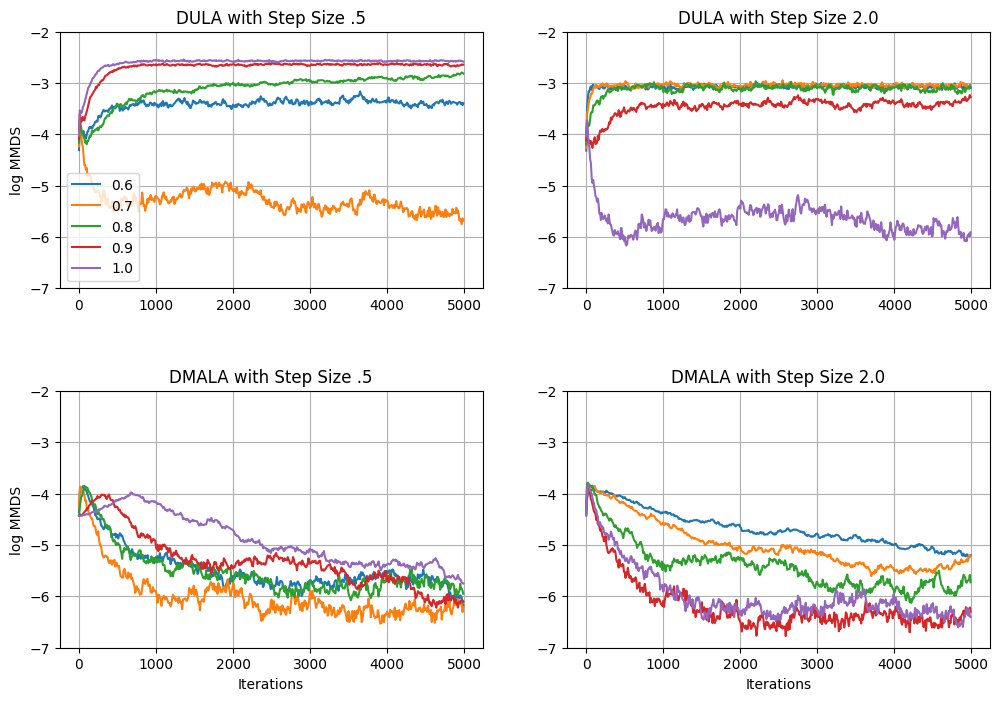

In [431]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
cycles = 500
small_step = .5
big_step = 2.0 
x = [i * 10 for i in range(500)]
yrange = [-2.5, -6.0]
for b in rbm_balance_constants: 
    data = log_mmds_cyc_dula_dct[get_dct_key(small_step, b, cycles)]
    ax[0, 0].grid()
    ax[0, 0].plot(x, data, label = b)
    ax[0, 0].legend(loc='lower left')
    ax[0, 0].set_title("DULA with Step Size .5")
    ax[0, 0].set_ylabel("log MMDS")
    
    data = log_mmds_cyc_dula_dct[get_dct_key(big_step, b, cycles)]
    ax[0, 1].grid()
    ax[0, 1].plot(x, data, label = f"balance constant = {b}")
    ax[0, 1].set_title("DULA with Step Size 2.0")

    
    data = log_mmds_cyc_dmala_dct[get_dct_key(small_step, b, cycles)]
    ax[1, 0].grid()
    ax[1, 0].plot(x, data, label = f"balance constant = {b}")
    ax[1, 0].set_title("DMALA with Step Size .5")
    ax[1, 0].set_ylabel("log MMDS")
    ax[1, 0].set_xlabel("Iterations")
    
    data = log_mmds_cyc_dmala_dct[get_dct_key(big_step, b, cycles)]
    print(get_dct_key(big_step, b, cycles))
    ax[1, 1].grid()
    ax[1, 1].plot(x, data, label = f"balance constant = {b}")
    ax[1, 1].set_title("DMALA with Step Size 2.0")
    ax[1, 1].set_xlabel("Iterations")
plt.setp(ax, yticks=[-7, -6, -5, -4, -3, -2])
plt.subplots_adjust(hspace=0.4)

In [418]:
log_rmse_cyc_dula_dct = {}
log_rmse_cyc_dmala_dct = {}
log_rmse_times_dula_dct = {}
log_rmse_times_dmala_dct = {}

for s in rbm_stepsizes: 
    for b in rbm_balance_constants: 
        for c in [100, 500, 1000, 5000]: 
            k = get_dct_key(s, b, c)
            cyc_dula = get_cyc_model('cyc_dula', c, s, True, b, True)
            data = get_data('figs/ising_sample', cyc_dula, 'log_rmses')
            log_rmse_cyc_dula_dct[k] = data

            cyc_dmala = get_cyc_model('cyc_dmala', c, s, True, b, True)
            data = get_data('figs/ising_sample', cyc_dmala, 'log_rmses')
            log_rmse_cyc_dmala_dct[k] = data

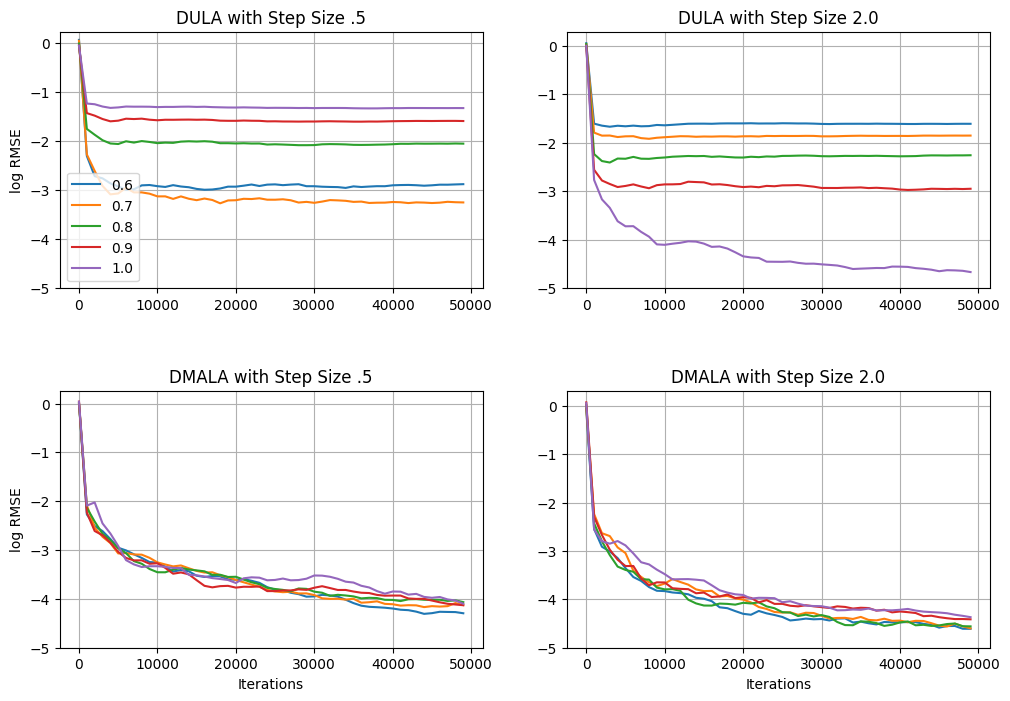

In [425]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
cycles = 1000
small_step = .5
big_step = 2.0 
x = [i * 1000 for i in range(50)]
for b in rbm_balance_constants: 
    data = log_rmse_cyc_dula_dct[get_dct_key(small_step, b, cycles)]
    ax[0, 0].grid()
    ax[0, 0].plot(x, data, label = b)
    ax[0, 0].legend(loc='lower left')
    ax[0, 0].set_title("DULA with Step Size .5")
    ax[0, 0].set_ylabel("log RMSE")
    
    data = log_rmse_cyc_dula_dct[get_dct_key(big_step, b, cycles)]
    ax[0, 1].grid()
    ax[0, 1].plot(x, data, label = f"balance constant = {b}")
    ax[0, 1].set_title("DULA with Step Size 2.0")

    
    data = log_rmse_cyc_dmala_dct[get_dct_key(small_step, b, cycles)]
    ax[1, 0].grid()
    ax[1, 0].plot(x, data, label = f"balance constant = {b}")
    ax[1, 0].set_title("DMALA with Step Size .5")
    ax[1, 0].set_ylabel("log RMSE")
    ax[1, 0].set_xlabel("Iterations")
    
    data = log_rmse_cyc_dmala_dct[get_dct_key(big_step, b, cycles)]
    ax[1, 1].grid()
    ax[1, 1].plot(x, data, label = f"balance constant = {b}")
    ax[1, 1].set_title("DMALA with Step Size 2.0")
    ax[1, 1].set_xlabel("Iterations")
plt.setp(ax, yticks=[0, -1, -2, -3, -4, -5])
plt.subplots_adjust(hspace=0.4)

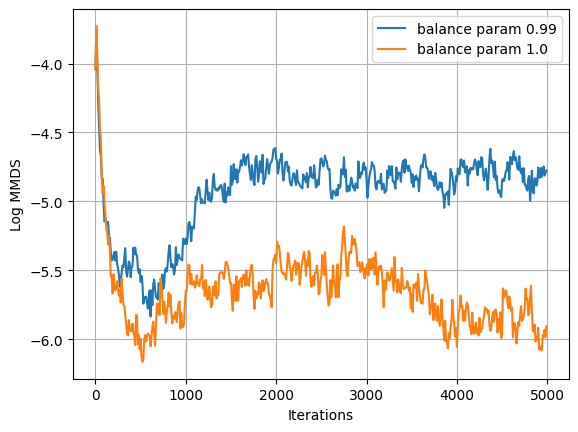

In [46]:
cycles = 500
step = 2.0
balance_param = [.99, 1.0]
x = [i * 10 for i in range(500)]
for b in balance_param:
    cyc_dula = get_cyc_model('cyc_dula', cycles, step, True, b, True, False)
    data = get_data('figs/rbm_sample', cyc_dula, 'log_mmds')
    plt.plot(x, data, label=f'balance param {b}')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel("Log MMDS")
plt.legend()

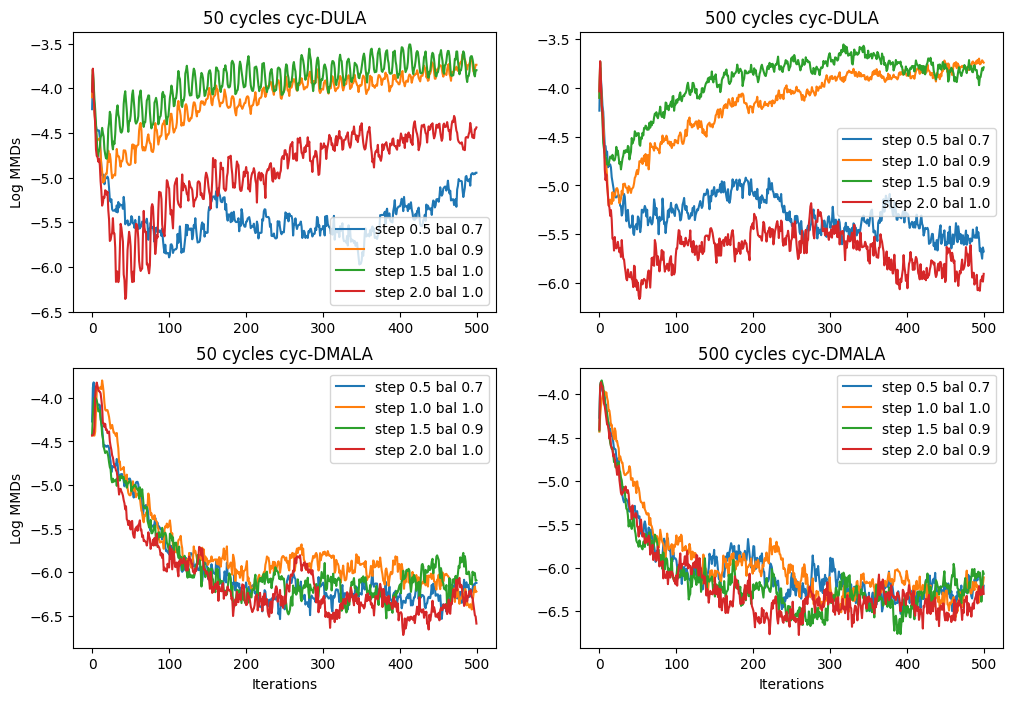

In [438]:
# sensitivities to cycles -- rbm sample
few_cycles = 50 
many_cycles = 500 
steps = [.5, 1.0, 1.5, 2.0]
bal_values = [.6, .7, .8, .9, 1.0]
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for s in steps: 
    for i, cycles in enumerate([few_cycles, many_cycles]): 
        for j, temp in enumerate(['cyc-DULA', 'cyc-DMALA']):
            ax[j, i].grid()
            ax[j, i].set_title(f"{cycles} cycles {temp}")
            best_val = np.inf
            best_b = None
            if temp == 'cyc-DULA': 
                value_dct = log_mmds_cyc_dula_dct
            else: 
                value_dct = log_mmds_cyc_dmala_dct
            for b in bal_values: 
                data = value_dct[get_dct_key(s, b, cycles)]
                mean = data[int(3 * len(data)) // 4: ].mean()
                if mean < best_val: 
                    best_val = mean
                    best_b = b
            best_data = value_dct[get_dct_key(s, best_b, cycles)]
            ax[j, i].plot(best_data, label=f"step {s} bal {best_b}")     
            ax[j, i].legend()
            ax[j, i].grid()
            if j == 1: 
                ax[j, i].set_xlabel("Iterations")
            if i == 0:
                ax[j, i].set_ylabel("Log MMDs")
            

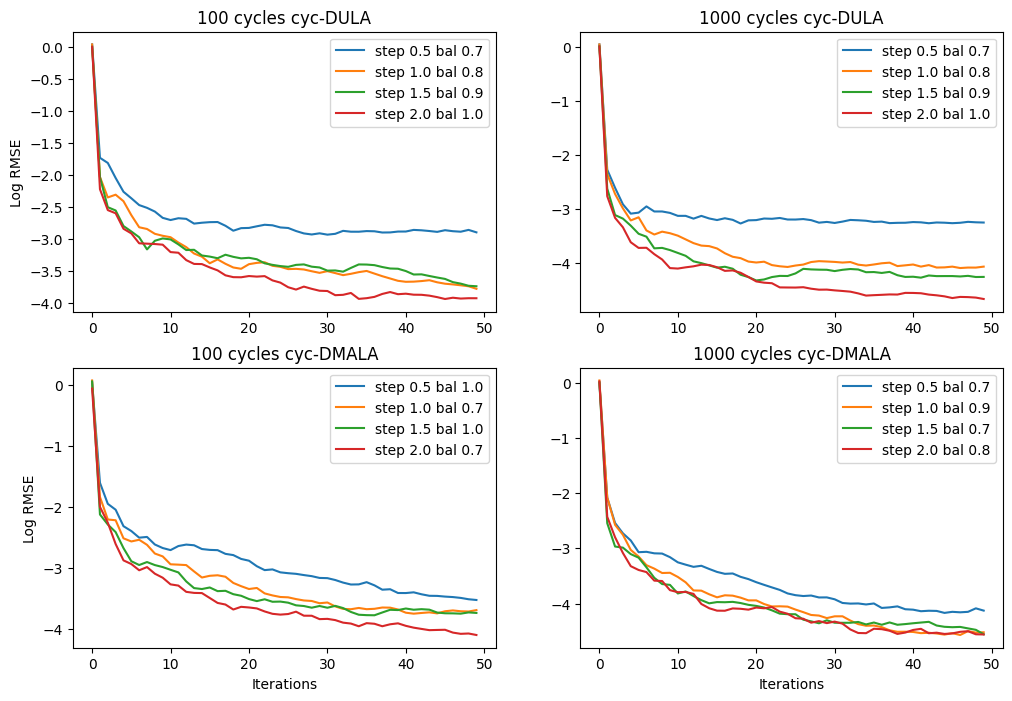

In [434]:
# sensitivities to cycles -- ising sample
few_cycles = 100 
many_cycles = 1000 
steps = [.5, 1.0, 1.5, 2.0]
bal_values = [.7, .8, .9, 1.0]
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for s in steps: 
    for i, cycles in enumerate([few_cycles, many_cycles]): 
        for j, temp in enumerate(['cyc-DULA', 'cyc-DMALA']):
            ax[j, i].set_title(f"{cycles} cycles {temp}")
            best_val = np.inf
            best_b = None
            if temp == 'cyc-DULA': 
                value_dct = log_rmse_cyc_dula_dct
            else: 
                value_dct = log_rmse_cyc_dmala_dct
            for b in bal_values: 
                data = value_dct[get_dct_key(s, b, cycles)]
                mean = data[len(data) // 2: ].mean()
                if mean < best_val: 
                    best_val = mean
                    best_b = b
            best_data = value_dct[get_dct_key(s, best_b, cycles)]
            ax[j, i].plot(best_data, label=f"step {s} bal {best_b}")        
            ax[j, i].grid()
            ax[j, i].legend()
            if j == 1: 
                ax[j, i].set_xlabel("Iterations")
            if i == 0: 
                ax[j, i].set_ylabel("Log RMSE")
            

In [458]:
base_dir = 'figs/ebm'
np.load(f"{base_dir}/test_ll_static_mnist_cyc_dula_2.0.npy")

array([-208.45462036, -160.51953125, -135.03857422, -115.43994141,
       -109.24316406, -108.26953125, -108.04150391, -108.25292969,
       -108.50537109, -108.16015625])